# Preprocessing

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Data

In [42]:
FILE_PATH = "data/balance_sheets_quarterly.csv"
df = pd.read_csv(FILE_PATH)

df.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink,marketCap
0,2024-03-31,PKP.WA,PLN,0,2024-03-31,2024-03-29 20:00:00,2024,Q1,176600000.0,0.0,...,3.064900e+09,8.250300e+09,0.0,8.250300e+09,51500000.0,2.895400e+09,2.718800e+09,NaN,NaN,2.929004e+10
1,2023-12-31,PKP.WA,PLN,0,2023-12-31,2023-12-30 19:00:00,2023,Q4,226200000.0,-10100000.0,...,3.202500e+09,8.320000e+09,0.0,8.320000e+09,42700000.0,2.893800e+09,2.667600e+09,NaN,NaN,3.264899e+10
2,2023-09-30,PKP.WA,PLN,0,2023-09-30,2023-09-29 20:00:00,2023,Q3,216800000.0,-16900000.0,...,3.286400e+09,8.290200e+09,0.0,8.290200e+09,41100000.0,2.653000e+09,2.436200e+09,NaN,NaN,3.296250e+10
3,2023-06-30,PKP.WA,PLN,0,2023-06-30,2023-06-29 20:00:00,2023,Q2,174600000.0,-16900000.0,...,3.303200e+09,8.107900e+09,0.0,8.107900e+09,40500000.0,2.650400e+09,2.475800e+09,NaN,NaN,3.842639e+10
4,2023-03-31,PKP.WA,PLN,0,2023-03-31,2023-03-30 20:00:00,2023,Q1,230300000.0,-16300000.0,...,3.357600e+09,8.048000e+09,0.0,8.048000e+09,42700000.0,2.675800e+09,2.445500e+09,NaN,NaN,3.585119e+10


In [43]:
len(df.columns)

55

## Dropping Unnecessary Data

### Drop rows where the reported currency is different from PLN

In [44]:
df = df[df["reportedCurrency"] == "PLN"]

### Drop columns that are completely useless for your analysis

In [45]:
columns_to_drop = [
    "reportedCurrency",
    "cik",
    "fillingDate",
    "acceptedDate",
    "calendarYear",
    "finalLink",
    "link",
    "period",
    "date" # dates aren't useful in our case and don't have an impact on the company market cap correlation with the balance sheet
]

existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns_to_drop)

df.head()

,symbol,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,marketCap
0,PKP.WA,176600000.0,0.0,176600000.0,639500000.0,189800000.0,121300000.0,1.127200e+09,6.803700e+09,0.0,...,0.0,3.064900e+09,3.064900e+09,8.250300e+09,0.0,8.250300e+09,51500000.0,2.895400e+09,2.718800e+09,2.929004e+10
1,PKP.WA,226200000.0,-10100000.0,226200000.0,716800000.0,200200000.0,146200000.0,1.289400e+09,6.734100e+09,0.0,...,0.0,3.202500e+09,3.202500e+09,8.320000e+09,0.0,8.320000e+09,42700000.0,2.893800e+09,2.667600e+09,3.264899e+10
2,PKP.WA,216800000.0,-16900000.0,216800000.0,712700000.0,224200000.0,141900000.0,1.295600e+09,6.698500e+09,0.0,...,0.0,3.286400e+09,3.286400e+09,8.290200e+09,0.0,8.290200e+09,41100000.0,2.653000e+09,2.436200e+09,3.296250e+10
3,PKP.WA,174600000.0,-16900000.0,174600000.0,679700000.0,217600000.0,140900000.0,1.212800e+09,6.605600e+09,0.0,...,0.0,3.303200e+09,3.303200e+09,8.107900e+09,0.0,8.107900e+09,40500000.0,2.650400e+09,2.475800e+09,3.842639e+10
4,PKP.WA,230300000.0,-16300000.0,230300000.0,802600000.0,219700000.0,143100000.0,1.395700e+09,6.367400e+09,0.0,...,0.0,3.357600e+09,3.357600e+09,8.048000e+09,0.0,8.048000e+09,42700000.0,2.675800e+09,2.445500e+09,3.585119e+10


### Drop companies that have less than 2 years of data (8 quarters)

In [46]:
print("Companies before dropping:", len(df["symbol"].unique()))

min_quarters = 8
df = df.groupby('symbol').filter(lambda x: len(x) >= min_quarters)

print("Companies after dropping:", len(df["symbol"].unique()))

Companies before dropping: 396
Companies after dropping: 390


### Drop rows with missing values in the market cap column

In [47]:
print("Rows before dropping:", len(df), "Companies:", len(df["symbol"].unique()))

df = df.dropna(subset=["marketCap"])

print("Rows after dropping:", len(df), "Companies:", len(df["symbol"].unique()))

Rows before dropping: 18080 Companies: 390
Rows after dropping: 16905 Companies: 375


In [48]:
df.columns[df.isnull().any()].tolist() # There are no other missing values

[]

### Drop redundant columns that combined data from other columns

In [49]:
columns_to_drop = [
    "cashAndShortTermInvestments",
    "goodwillAndIntangibleAssets",
    "totalLiabilitiesAndStockholdersEquity",
    "totalLiabilitiesAndTotalEquity",
]

df = df.drop(columns=columns_to_drop)

## Renaming columns

In [50]:
df.columns

Index(['symbol', 'cashAndCashEquivalents', 'shortTermInvestments',
       'netReceivables', 'inventory', 'otherCurrentAssets',
       'totalCurrentAssets', 'propertyPlantEquipmentNet', 'goodwill',
       'intangibleAssets', 'longTermInvestments', 'taxAssets',
       'otherNonCurrentAssets', 'totalNonCurrentAssets', 'otherAssets',
       'totalAssets', 'accountPayables', 'shortTermDebt', 'taxPayables',
       'deferredRevenue', 'otherCurrentLiabilities', 'totalCurrentLiabilities',
       'longTermDebt', 'deferredRevenueNonCurrent',
       'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities',
       'totalNonCurrentLiabilities', 'otherLiabilities',
       'capitalLeaseObligations', 'totalLiabilities', 'preferredStock',
       'commonStock', 'retainedEarnings',
       'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalEquity', 'minorityInterest', 'totalInvestments', 'totalDebt',
       'netDebt', 'marketCap

In [51]:
column_translation = {
    "date": "data",
    "symbol": "symbol",
    "cashAndCashEquivalents": "gotówka_i_ekwiwalenty_gotówki",
    "shortTermInvestments": "inwestycje_krótkoterminowe",
    "netReceivables": "należności_netto",
    "inventory": "zapasy",
    "otherCurrentAssets": "inne_aktywa_obrotowe",
    "totalCurrentAssets": "suma_aktywow_obrotowych",
    "propertyPlantEquipmentNet": "środki_trwałe_netto",
    "goodwill": "wartość_firmy",
    "intangibleAssets": "wartości_niematerialne",
    "longTermInvestments": "inwestycje_długoterminowe",
    "taxAssets": "aktywa_podatkowe",
    "otherNonCurrentAssets": "inne_aktywa_trwałe",
    "totalNonCurrentAssets": "suma_aktywow_trwałych",
    "otherAssets": "pozostałe_aktywa",
    "totalAssets": "suma_aktywow",
    "accountPayables": "zobowiązania_z_tytułu_dostaw_i_usług",
    "shortTermDebt": "zobowiązania_krótkoterminowe",
    "taxPayables": "zobowiązania_podatkowe",
    "deferredRevenue": "przychody_rozliczane_w_czasie",
    "otherCurrentLiabilities": "inne_zobowiązania_obrotowe",
    "totalCurrentLiabilities": "suma_zobowiązań_krótkoterminowych",
    "longTermDebt": "zobowiązania_długoterminowe",
    "deferredRevenueNonCurrent": "przychody_rozliczane_w_czasie_długoterminowe",
    "deferredTaxLiabilitiesNonCurrent": "zobowiązania_z_tytułu_podatków_odroczonych",
    "otherNonCurrentLiabilities": "inne_zobowiązania_długoterminowe",
    "totalNonCurrentLiabilities": "suma_zobowiązań_długoterminowych",
    "otherLiabilities": "pozostałe_zobowiązania",
    "capitalLeaseObligations": "zobowiązania_z_tytułu_leasingu_finansowego",
    "totalLiabilities": "suma_zobowiązań",
    "preferredStock": "akcje_uprzywilejowane",
    "commonStock": "akcje_zwykłe",
    "retainedEarnings": "zyski_zatrzymane",
    "accumulatedOtherComprehensiveIncomeLoss": "skumulowane_inne_całkowite_dochody_straty",
    "othertotalStockholdersEquity": "pozostały_całkowity_kapitał_własny_akcjonariuszy",
    "totalStockholdersEquity": "kapitał_własny_akcjonariuszy",
    "totalEquity": "całkowity_kapitał_własny",
    "minorityInterest": "mniejszościowe_udziały",
    "totalInvestments": "suma_inwestycji",
    "totalDebt": "suma_zadłużenia",
    "netDebt": "zadłużenie_netto",
    "marketCap": "kapitalizacja_rynkowa",
}

df_renamed = df.rename(columns=column_translation)

print(df_renamed.columns)

Index(['symbol', 'gotówka_i_ekwiwalenty_gotówki', 'inwestycje_krótkoterminowe',
       'należności_netto', 'zapasy', 'inne_aktywa_obrotowe',
       'suma_aktywow_obrotowych', 'środki_trwałe_netto', 'wartość_firmy',
       'wartości_niematerialne', 'inwestycje_długoterminowe',
       'aktywa_podatkowe', 'inne_aktywa_trwałe', 'suma_aktywow_trwałych',
       'pozostałe_aktywa', 'suma_aktywow',
       'zobowiązania_z_tytułu_dostaw_i_usług', 'zobowiązania_krótkoterminowe',
       'zobowiązania_podatkowe', 'przychody_rozliczane_w_czasie',
       'inne_zobowiązania_obrotowe', 'suma_zobowiązań_krótkoterminowych',
       'zobowiązania_długoterminowe',
       'przychody_rozliczane_w_czasie_długoterminowe',
       'zobowiązania_z_tytułu_podatków_odroczonych',
       'inne_zobowiązania_długoterminowe', 'suma_zobowiązań_długoterminowych',
       'pozostałe_zobowiązania', 'zobowiązania_z_tytułu_leasingu_finansowego',
       'suma_zobowiązań', 'akcje_uprzywilejowane', 'akcje_zwykłe',
       'zyski_za

## Pearson Correlation

### Plotting the correlation matrix

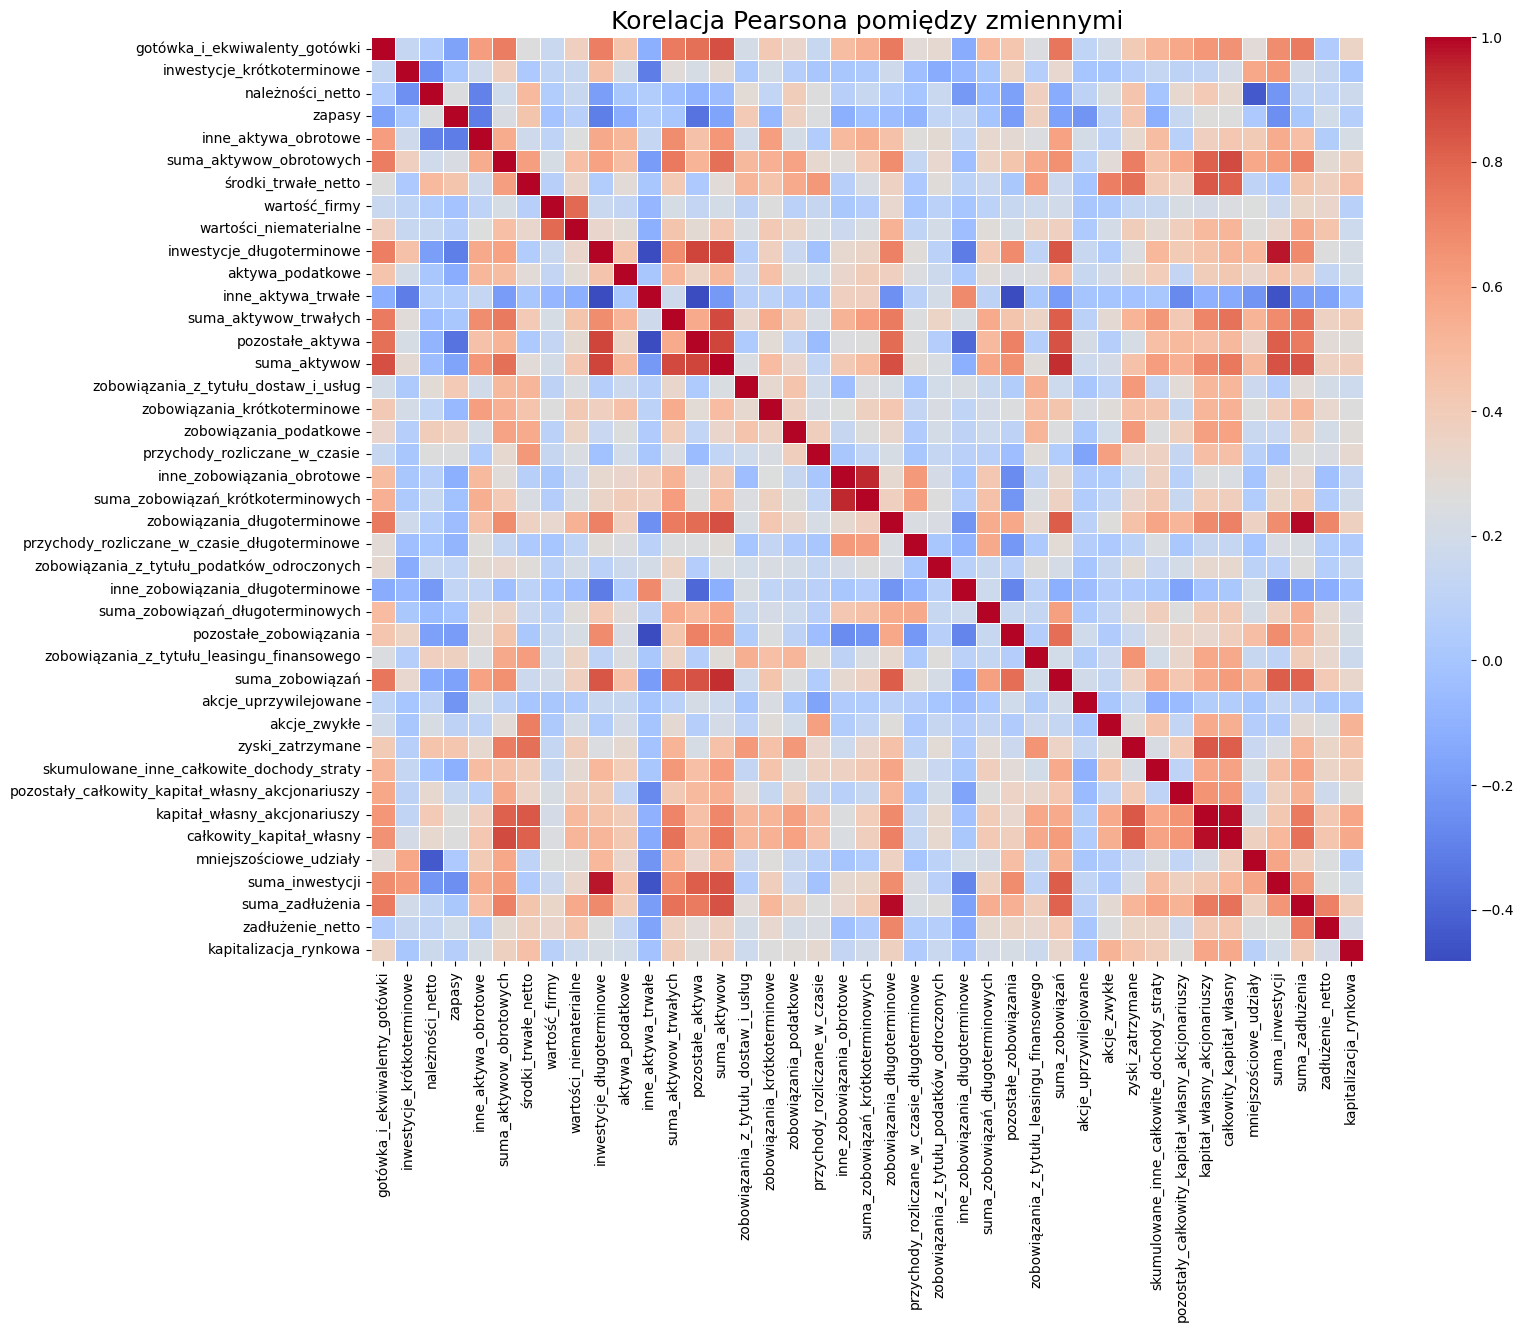

In [52]:
df_numeric = df.drop(columns=["symbol"])

correlation_matrix = df_numeric.corr()

# Rename the columns using the translation dictionary
correlation_matrix_translated = correlation_matrix.rename(
    index=column_translation, columns=column_translation
)


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_translated, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Korelacja Pearsona pomiędzy zmiennymi", fontsize=18)
plt.show()

### Dropping features with very high correlation

In [53]:
high_corr_threshold = 0.9

# Identify columns with high correlation (ignoring the diagonal)
high_corr_pairs = set()
for i in range(len(correlation_matrix_translated.columns)):
    for j in range(i):
        if abs(correlation_matrix_translated.iloc[i, j]) >= high_corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.add((colname_i, colname_j))

high_corr_pairs

{('totalCurrentLiabilities', 'otherCurrentLiabilities'),
 ('totalDebt', 'longTermDebt'),
 ('totalEquity', 'totalStockholdersEquity'),
 ('totalInvestments', 'longTermInvestments'),
 ('totalLiabilities', 'totalAssets')}

I decided to drop these features from pairs:
- otherCurrentLiabilities
- longTermDebt
- totalEquity 
- totalInvestments 
- totalLiabilities

In [54]:
columns_to_drop = [
    "otherCurrentLiabilities",  # Keep totalCurrentLiabilities
    "longTermDebt",  # Keep totalDebt
    "totalEquity",  # Keep totalStockholdersEquity
    "totalInvestments",  # Keep longTermInvestments
    "totalLiabilities",  # Keep totalAssets
]

df = df.drop(columns=columns_to_drop)